Alunos:

Filipe Moreno

Diogo Costa

Gabriel Costa

Lucas Barros

Matheus Soares

Rennan Pontes

Ian Pedro

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
import missingno as msno

In [ ]:
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Global YouTube StatisticsATVD2.csv', encoding = 'ISO-8859-1')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
ytb_df = ["rank", "Youtuber", "subscribers", "video views", "uploads", "Country", "channel_type", "created_year"]
df = df.loc[:, ytb_df]

In [ ]:
df.dropna(inplace = True)

In [ ]:
sample_data1 = df.sample(frac= 0.30)
sample_data2 = df.sample(frac= 0.30)

In [ ]:
sample_data1.describe()

,rank,subscribers,video views,uploads,created_year
count,259.000000,2.590000e+02,2.590000e+02,259.000000,259.000000
mean,519.884170,2.138147e+07,1.041763e+10,8525.664093,2012.571429
std,284.230612,1.207884e+07,9.597312e+09,31794.754714,5.016032
min,11.000000,1.240000e+07,4.390980e+05,0.000000,1970.000000
25%,284.000000,1.440000e+07,4.427376e+09,291.500000,2009.000000
50%,529.000000,1.720000e+07,7.274150e+09,724.000000,2013.000000
75%,757.500000,2.345000e+07,1.347620e+10,2418.500000,2016.000000
max,990.000000,9.670000e+07,6.151091e+10,293516.000000,2021.000000


## Comparação Sample 1 e DF

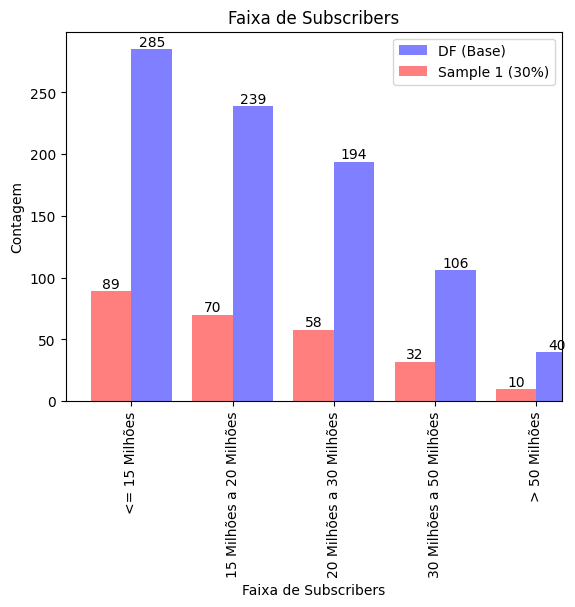

In [ ]:
faixas_df = [
    (df['subscribers'] <= 15_000_000),
    (df['subscribers'] > 15_000_000) & (df['subscribers'] <= 20_000_000),
    (df['subscribers'] > 20_000_000) & (df['subscribers'] <= 30_000_000),
    (df['subscribers'] > 30_000_000) & (df['subscribers'] <= 50_000_000),
    (df['subscribers'] > 50_000_000)
]

contagens_df = [faixa.sum() for faixa in faixas_df]

rotulos_df = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_df = pd.DataFrame({'Faixa de Subscribers (DF)': rotulos_df, 'Contagem (DF)': contagens_df})

faixas_sample = [
    (sample_data1['subscribers'] <= 15_000_000),
    (sample_data1['subscribers'] > 15_000_000) & (sample_data1['subscribers'] <= 20_000_000),
    (sample_data1['subscribers'] > 20_000_000) & (sample_data1['subscribers'] <= 30_000_000),
    (sample_data1['subscribers'] > 30_000_000) & (sample_data1['subscribers'] <= 50_000_000),
    (sample_data1['subscribers'] > 50_000_000)
]

contagens_sample = [faixa.sum() for faixa in faixas_sample]

rotulos_sample = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_sample = pd.DataFrame({'Faixa de Subscribers (Sample)': rotulos_sample, 'Contagem (Sample)': contagens_sample})

cores_df = ['blue']
cores_sample = ['red']

fig, ax = plt.subplots()

counts_df.plot(kind="bar", x='Faixa de Subscribers (DF)', y='Contagem (DF)', alpha=0.5, ax=ax, position=0, width=0.4, color=cores_df)
counts_sample.plot(kind="bar", x='Faixa de Subscribers (Sample)', y='Contagem (Sample)', alpha=0.5, ax=ax, position=1, width=0.4, color=cores_sample)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Faixa de Subscribers')
plt.ylabel('Contagem')
plt.xlabel('Faixa de Subscribers')
plt.legend(["DF (Base)", "Sample 1 (30%)"])
plt.show()

## Comparação Sample 2 e DF

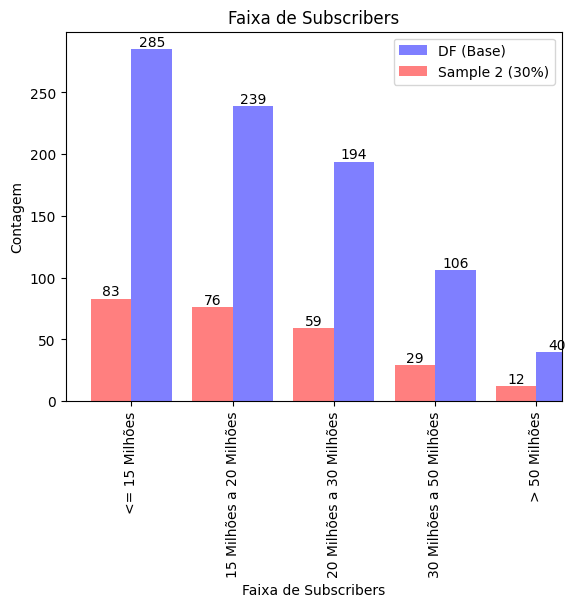

In [ ]:
faixas_df = [
    (df['subscribers'] <= 15_000_000),
    (df['subscribers'] > 15_000_000) & (df['subscribers'] <= 20_000_000),
    (df['subscribers'] > 20_000_000) & (df['subscribers'] <= 30_000_000),
    (df['subscribers'] > 30_000_000) & (df['subscribers'] <= 50_000_000),
    (df['subscribers'] > 50_000_000)
]

contagens_df = [faixa.sum() for faixa in faixas_df]

rotulos_df = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_df = pd.DataFrame({'Faixa de Subscribers (DF)': rotulos_df, 'Contagem (DF)': contagens_df})

faixas_sample = [
    (sample_data2['subscribers'] <= 15_000_000),
    (sample_data2['subscribers'] > 15_000_000) & (sample_data2['subscribers'] <= 20_000_000),
    (sample_data2['subscribers'] > 20_000_000) & (sample_data2['subscribers'] <= 30_000_000),
    (sample_data2['subscribers'] > 30_000_000) & (sample_data2['subscribers'] <= 50_000_000),
    (sample_data2['subscribers'] > 50_000_000)
]

contagens_sample = [faixa.sum() for faixa in faixas_sample]

rotulos_sample = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_sample = pd.DataFrame({'Faixa de Subscribers (Sample)': rotulos_sample, 'Contagem (Sample)': contagens_sample})

cores_df = ['blue']
cores_sample = ['red']

fig, ax = plt.subplots()

counts_df.plot(kind="bar", x='Faixa de Subscribers (DF)', y='Contagem (DF)', alpha=0.5, ax=ax, position=0, width=0.4, color=cores_df)
counts_sample.plot(kind="bar", x='Faixa de Subscribers (Sample)', y='Contagem (Sample)', alpha=0.5, ax=ax, position=1, width=0.4, color=cores_sample)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Faixa de Subscribers')
plt.ylabel('Contagem')
plt.xlabel('Faixa de Subscribers')
plt.legend(["DF (Base)", "Sample 2 (30%)"])
plt.show()

## Comparação Sample 1 e Sample 2

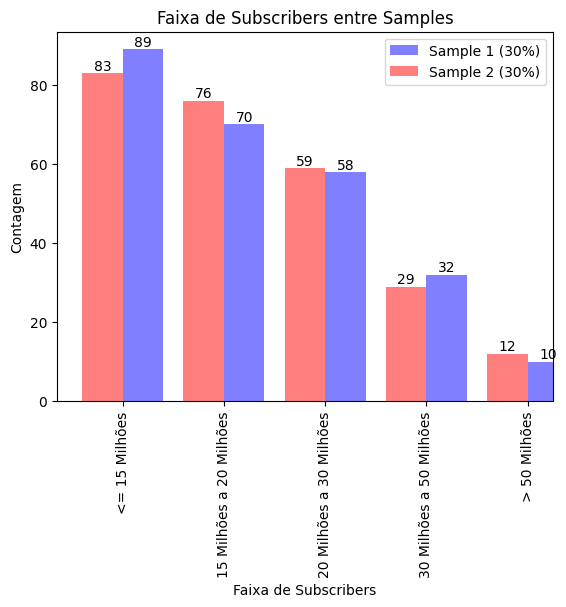

In [ ]:
faixas_df = [
    (sample_data1['subscribers'] <= 15_000_000),
    (sample_data1['subscribers'] > 15_000_000) & (sample_data1['subscribers'] <= 20_000_000),
    (sample_data1['subscribers'] > 20_000_000) & (sample_data1['subscribers'] <= 30_000_000),
    (sample_data1['subscribers'] > 30_000_000) & (sample_data1['subscribers'] <= 50_000_000),
    (sample_data1['subscribers'] > 50_000_000)
]

contagens_df = [faixa.sum() for faixa in faixas_df]

rotulos_df = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_df = pd.DataFrame({'Faixa de Subscribers (DF)': rotulos_df, 'Contagem (DF)': contagens_df})

faixas_sample = [
    (sample_data2['subscribers'] <= 15_000_000),
    (sample_data2['subscribers'] > 15_000_000) & (sample_data2['subscribers'] <= 20_000_000),
    (sample_data2['subscribers'] > 20_000_000) & (sample_data2['subscribers'] <= 30_000_000),
    (sample_data2['subscribers'] > 30_000_000) & (sample_data2['subscribers'] <= 50_000_000),
    (sample_data2['subscribers'] > 50_000_000)
]

contagens_sample = [faixa.sum() for faixa in faixas_sample]

rotulos_sample = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

counts_sample = pd.DataFrame({'Faixa de Subscribers (Sample)': rotulos_sample, 'Contagem (Sample)': contagens_sample})

cores_df = ['blue']
cores_sample = ['red']

fig, ax = plt.subplots()

counts_df.plot(kind="bar", x='Faixa de Subscribers (DF)', y='Contagem (DF)', alpha=0.5, ax=ax, position=0, width=0.4, color=cores_df)
counts_sample.plot(kind="bar", x='Faixa de Subscribers (Sample)', y='Contagem (Sample)', alpha=0.5, ax=ax, position=1, width=0.4, color=cores_sample)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Faixa de Subscribers entre Samples')
plt.ylabel('Contagem')
plt.xlabel('Faixa de Subscribers')
plt.legend(["Sample 1 (30%)", "Sample 2 (30%)"])
plt.show()

In [ ]:
sample_data_mean = ((sample_data1['subscribers'].mean()) + (sample_data2['subscribers'].mean())) / 2
sample_data_median = ((sample_data1['subscribers'].median()) + (sample_data2['subscribers'].median())) / 2
sample_data_std = ((sample_data1['subscribers'].std()) + (sample_data2['subscribers'].std())) / 2

In [ ]:
meanDFS = df['subscribers'].mean() - sample_data_mean
mean_differenceS = (df['subscribers'].mean() - sample_data_mean) / df['subscribers'].mean() * 100
print(f"Existe uma diferença de {mean_differenceS:.2f}% na média.")
print(f"Esses valores equivalem a uma diferença direta de {meanDFS :.2f}")

Existe uma diferença de 4.65% na média.
Esses valores equivalem a uma diferença direta de 1065629.47


In [ ]:
medianDFS = df['subscribers'].median() - sample_data_median
median_differenceS = (df['subscribers'].median() - sample_data_median) / df['subscribers'].median() * 100
print(f"Existe uma diferença de {median_differenceS:.2f}% na média.")
print(f"Esses valores equivalem a uma diferença direta de {medianDFS :.2f}")

Existe uma diferença de 0.85% na média.
Esses valores equivalem a uma diferença direta de 150000.00


In [ ]:
stdDFS = df['subscribers'].std() - sample_data_std
std_differenceS = (df['subscribers'].std() - sample_data_std) / df['subscribers'].std() * 100
print(f"Existe uma diferença de {std_differenceS:.2f}% na média.")
print(f"Esses valores equivalem a uma diferença direta de {stdDFS :.2f}")

Existe uma diferença de 23.83% na média.
Esses valores equivalem a uma diferença direta de 4268832.35


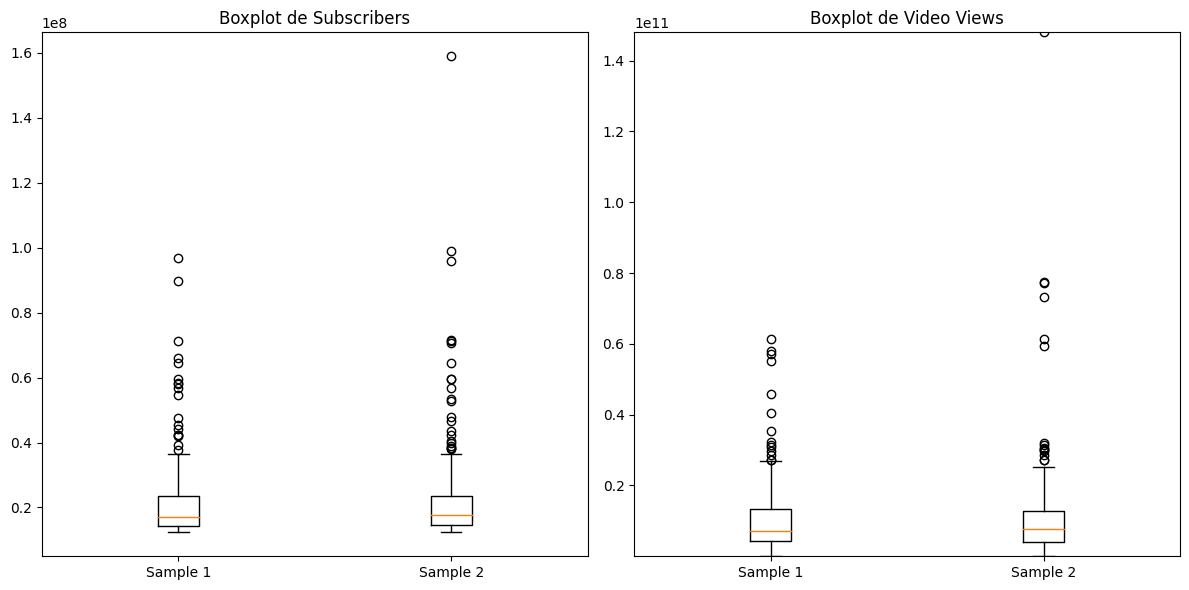

In [ ]:
subscribers_data1 = sample_data1['subscribers']
video_views_data1 = sample_data1['video views']

subscribers_data2 = sample_data2['subscribers']
video_views_data2 = sample_data2['video views']

faixa_de_valores = [subscribers_data1.min(), subscribers_data1.max(),
                    subscribers_data2.min(), subscribers_data2.max(),
                    video_views_data1.min(), video_views_data1.max(),
                    video_views_data2.min(), video_views_data2.max()]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([subscribers_data1, subscribers_data2], labels=['Sample 1', 'Sample 2'])
plt.title('Boxplot de Subscribers')

plt.subplot(1, 2, 2)
plt.boxplot([video_views_data1, video_views_data2], labels=['Sample 1', 'Sample 2'])
plt.title('Boxplot de Video Views')

plt.ylim(min(faixa_de_valores), max(faixa_de_valores))

plt.tight_layout()
plt.show()

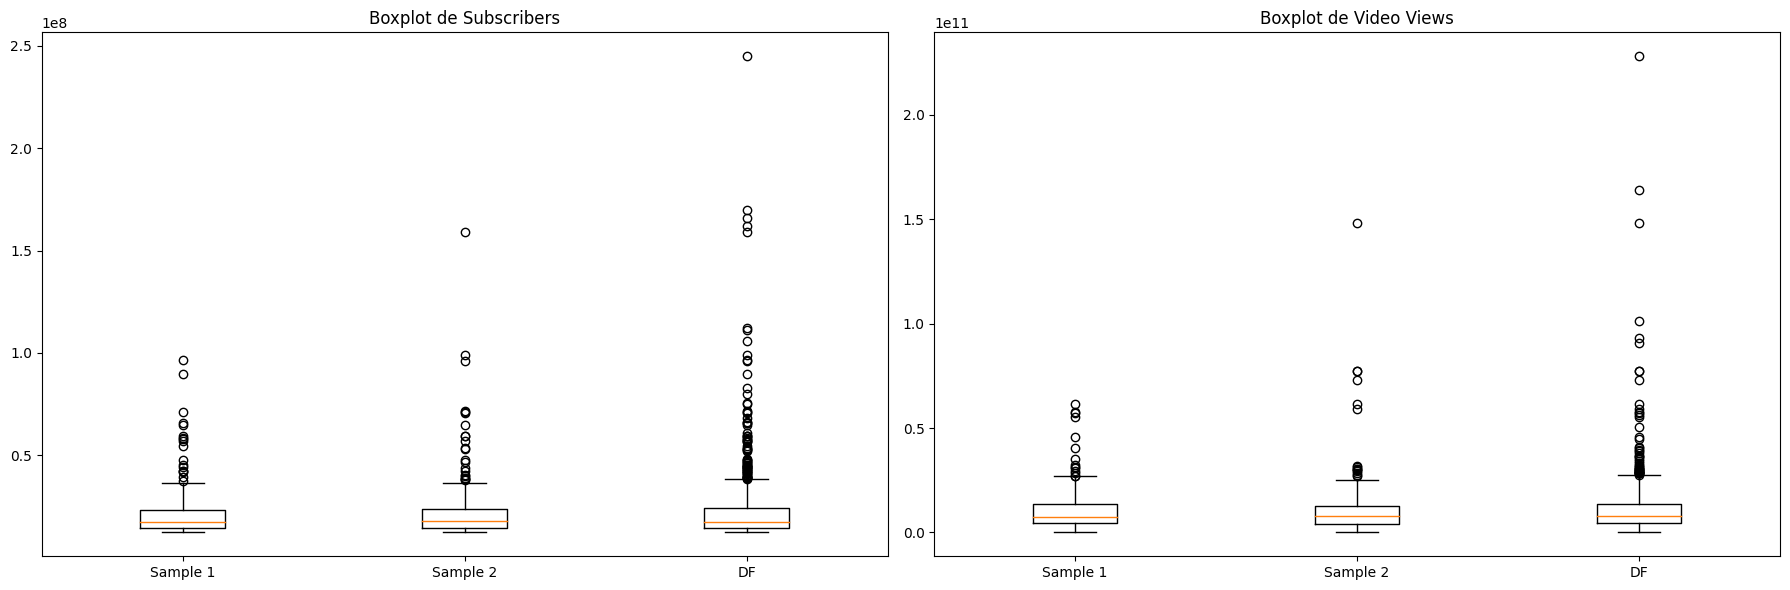

In [ ]:
subscribers_data1 = sample_data1['subscribers']
video_views_data1 = sample_data1['video views']

subscribers_data2 = sample_data2['subscribers']
video_views_data2 = sample_data2['video views']

subscribers_df = df['subscribers']
video_views_df = df['video views']

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.boxplot([subscribers_data1, subscribers_data2, subscribers_df], labels=['Sample 1', 'Sample 2', 'DF'])
plt.title('Boxplot de Subscribers')

plt.subplot(1, 2, 2)
plt.boxplot([video_views_data1, video_views_data2, video_views_df], labels=['Sample 1', 'Sample 2', 'DF'])
plt.title('Boxplot de Video Views')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot de Uploads')

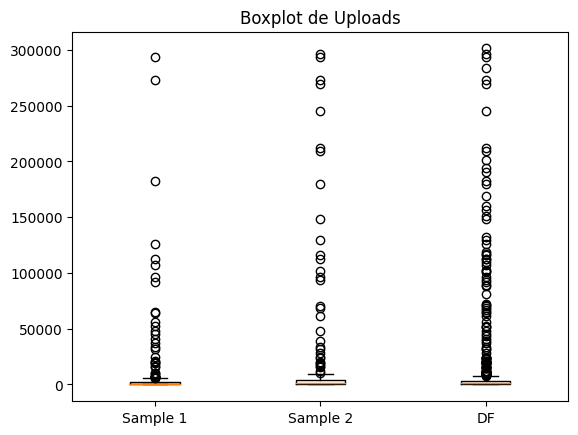

In [ ]:
uploads_data1 = sample_data1['uploads']
uploads_data2 = sample_data2['uploads']
uploads_df = df['uploads']

plt.boxplot([uploads_data1, uploads_data2, uploads_df], labels=['Sample 1', 'Sample 2', 'DF'])
plt.title('Boxplot de Uploads')

<ipython-input-349-3784ea5f8127>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados_sample1 = [sample_data1[faixa]['subscribers'] for faixa in faixas]
<ipython-input-349-3784ea5f8127>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados_sample2 = [sample_data2[faixa]['subscribers'] for faixa in faixas]


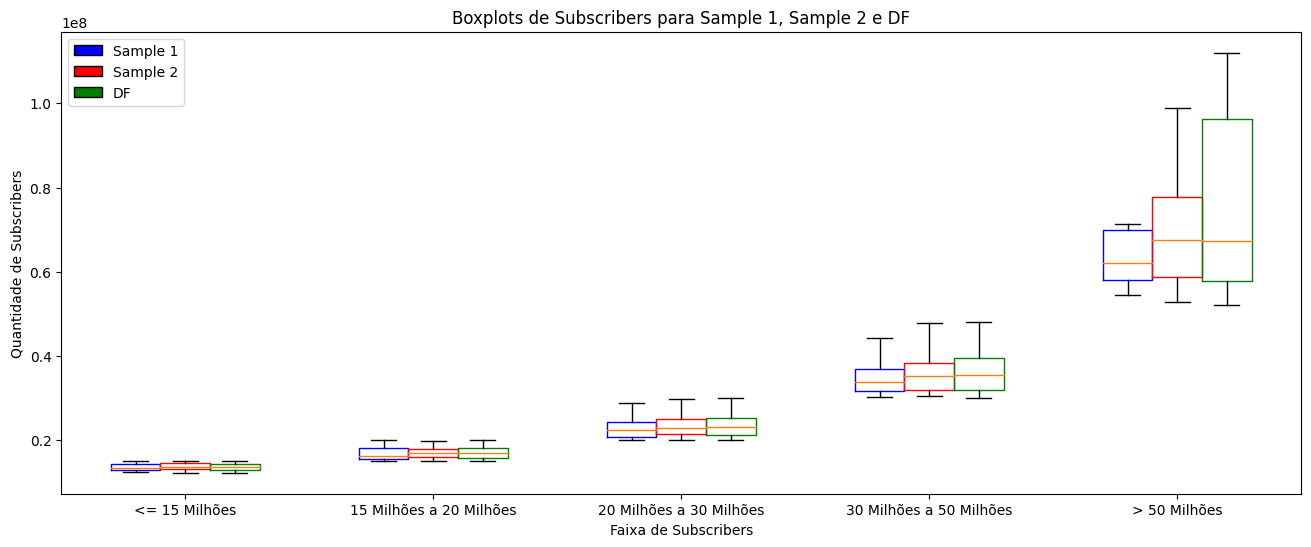

In [ ]:
dados_sample1 = [sample_data1[faixa]['subscribers'] for faixa in faixas]
dados_sample2 = [sample_data2[faixa]['subscribers'] for faixa in faixas]
dados_df = [df[faixa]['subscribers'] for faixa in faixas]

rotulos = ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões']

posicoes = list(range(1, len(rotulos) + 1))

width = 0.2

cores = ['blue', 'red', 'green']

plt.figure(figsize=(16, 6))
ax = plt.gca()

plt.boxplot(dados_sample1, positions=[pos - width for pos in posicoes], widths=width, showfliers=False, boxprops=dict(color=cores[0]))
plt.boxplot(dados_sample2, positions=posicoes, labels=rotulos, widths=width, showfliers=False, boxprops=dict(color=cores[1]))
plt.boxplot(dados_df, positions=[pos + width for pos in posicoes], widths=width, showfliers=False, boxprops=dict(color=cores[2]))

plt.xlabel('Faixa de Subscribers')
plt.ylabel('Quantidade de Subscribers')
plt.title('Boxplots de Subscribers para Sample 1, Sample 2 e DF')

ax.set_xlim([0.5, len(rotulos) + 0.5])

handles = [plt.Rectangle((0,0),1,1, color=c, ec="k") for c in cores]
plt.legend(handles, ['Sample 1', 'Sample 2', 'DF'])

plt.xticks([])
plt.xticks([1, 2, 3, 4, 5], ['<= 15 Milhões', '15 Milhões a 20 Milhões', '20 Milhões a 30 Milhões', '30 Milhões a 50 Milhões', '> 50 Milhões'])
plt.show()

<ipython-input-350-7d9c377e841f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample_data1.corr(), vmin=-1, vmax=1, annot=True)


<Axes: >

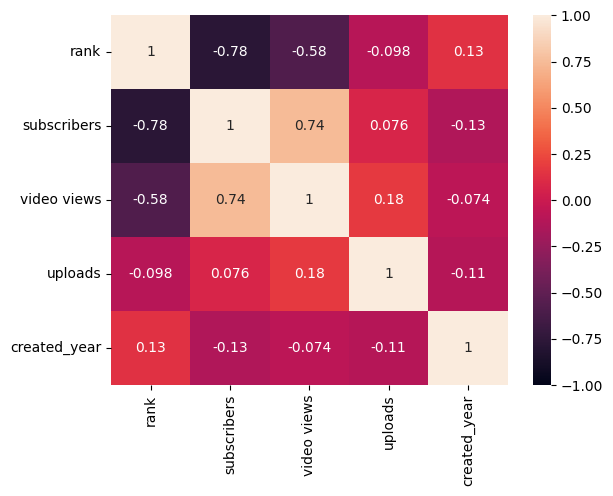

In [ ]:
sns.heatmap(sample_data1.corr(), vmin=-1, vmax=1, annot=True)

<ipython-input-351-ee86c7c86af2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample_data2.corr(), vmin=-1, vmax=1, annot=True)


<Axes: >

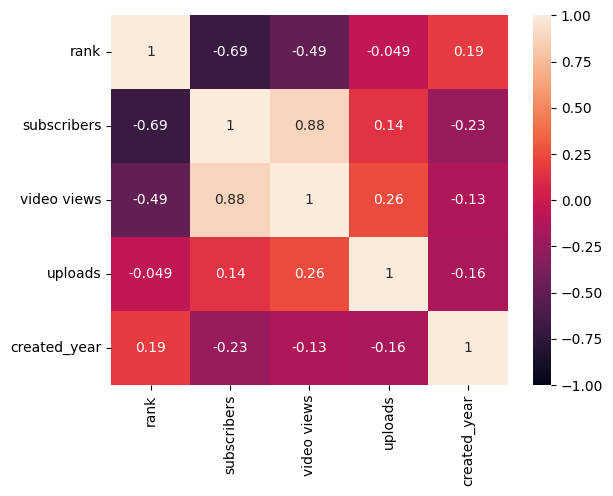

In [ ]:
sns.heatmap(sample_data2.corr(), vmin=-1, vmax=1, annot=True)